# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, because elpd_loo only has meaning relative to another elpd_loo value.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a model becomes too specialized to recognize a specific data set, so when it is applied to other datasets, it has trouble recognizing the data patterns.

**Task3**:

How do we mitigate overfitting?

We must use weakly informative priors or use models with a small number of variables.

**Task4**:

How do we mitigate underfitting?

We should select a model based on elpd_loo to reliably prevent the possiblity of underfitting.

**Task5**:

Why would we want more than one predictor in a model?

When multiple predictors are well chosen, they can mitigate the risk of oversimplification. They also help increase the accuracy of the model's predictions has it has more contextual information to work from.

**Task6**:

Can we have too many predictors? How would we now?

Yes, too many predictors will lead to the data becoming overfitted which will make the model difficult to use with test data sets. We can tell that we've added too many predictors if there is a large dicrepency in the accuracy of the model between training data and test data.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the act of using a portion of the predictors in a data set for a predictive model.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.


The first option gives the same slope for all categories of the categorical variable, but the intercepts can vary. This can result in different lines. The second option permits different slopes for each category. The third option enables the model to capture differences in the non-categorical variable across categories by accounting for their interaction.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?


We can't visualize the entire model in one graph because the predictors and predicted values exceed displayable dimensions. However, we can create a 2D graph by fixing all but one predictor and examining its relationship with the predicted value. Posterior predictive checks and elpd_loo charts are also options, though they are better suited for model comparisons than standalone visualization.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [2]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()


In [4]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

<ipython-input-4-bb9f7b7913fd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)


In [5]:
ft_pos_cat = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [6]:
ft_pos_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 13 divergences after tuning. Increase `target_accept` or reparameterize.


In [7]:
ft_pos_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [8]:
ft_pos_3pt_inter = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [9]:
ft_pos_3pt_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

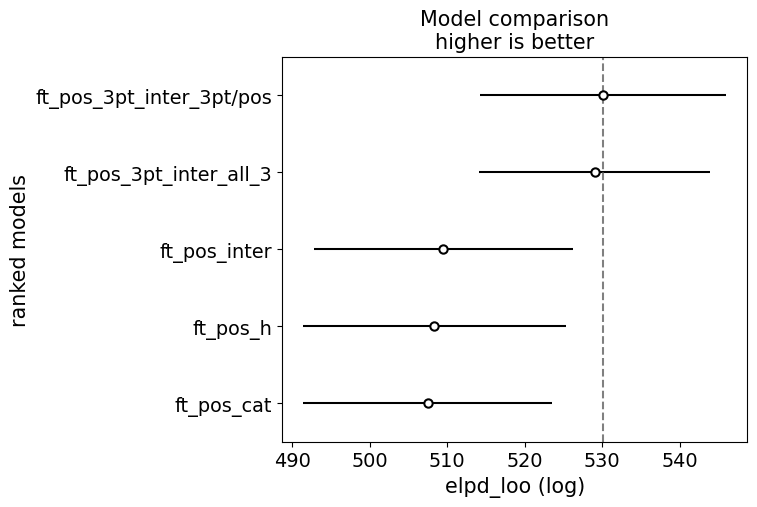

In [10]:
compare = az.compare({"ft_pos_cat":ft_pos_cat, "ft_pos_h":ft_pos_h, "ft_pos_inter":ft_pos_inter, "ft_pos_3pt_inter_all_3":ft_pos_3pt_inter, "ft_pos_3pt_inter_3pt/pos":ft_pos_3pt_inter2})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

Models that include three-point attempts outperform those without them. Between the two models with three-point attempts, the one with interactions limited to 3PA and Pos is superior to the one with interactions among all three predictors. This likely occurs because players who attempt more three-pointers tend to be better shooters overall, including at free throws. Increased three-point attempts will likely enhance shooting ability, and players who are worse shooters are less inclined to take three-point shots.